# I. Introduction

Data is coming from: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Import a Data-Set


In [3]:
cl_file_name = "/content/drive/MyDrive/Data analytics course/Mall_Customers.csv"
cl_df = pd.read_csv(cl_file_name)
cl_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
independant_var = cl_df.iloc[:, [2,4]].values

In [ ]:
independant_var

#3. Pre-processing. Select Cluster Count, based on Dendogram

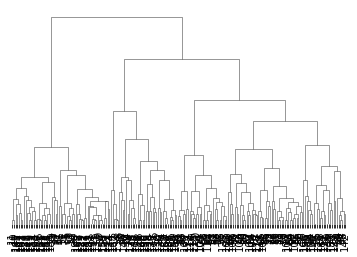

In [6]:
sns.matrix.dendrogram(data=independant_var, axis=0)

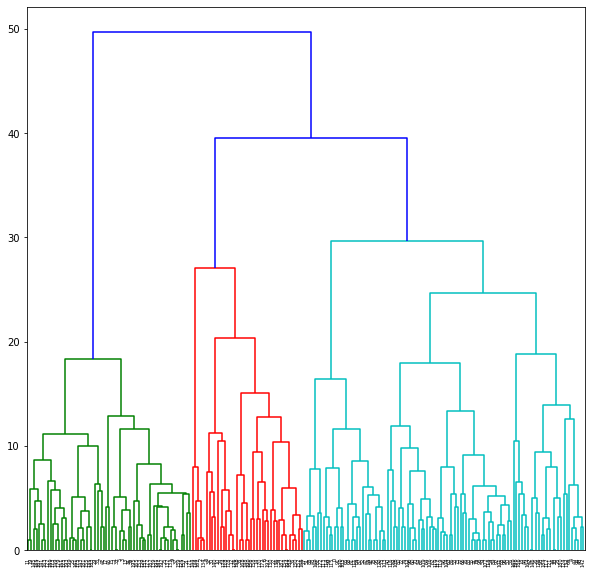

In [10]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 10))
drg = sch.dendrogram(sch.linkage(independant_var, method="average"))




---


**Q 28.01**: What number of clusters would be optimal for HC case?

In our case optimal number of clusters is **2 (better) or 3**.



---



# 5. Training of K-means Model

In [12]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters_predicted = hc_model.fit_predict(independant_var) 

In [13]:
clusters_predicted

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1])

In [14]:
res = cl_df.copy()
res["Cluster"] = clusters_predicted # izveido jaunu kolonnu
res

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2




---


**Q 28.02**: Construct scatter-plot with coloring of each cluster

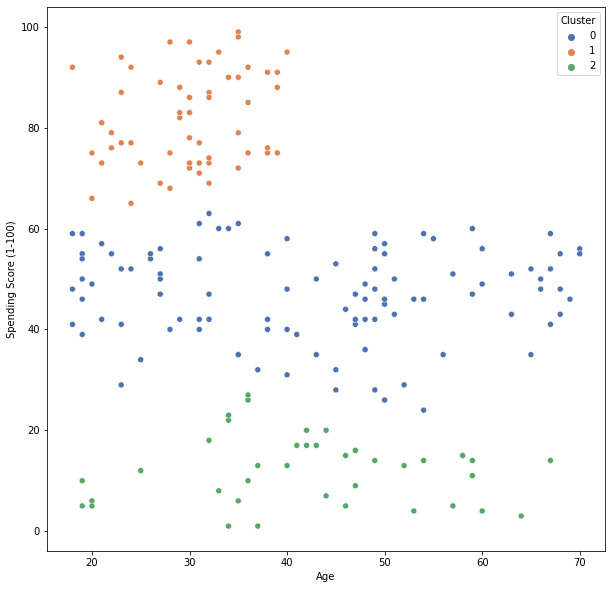

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=res, x='Age', y='Spending Score (1-100)', hue="Cluster", palette="deep")



---

